# EDA

In [5]:
import os 
import numpy as np
import json
import tifffile as tiff
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

## File Structure

We have 4 different folders:
/data\
    \_ raw_tiffs
    \_ meta
    \_ label_json

In [6]:
rawtiffs_path = '/workspace/Competition/map_segmentation/data/RAW/train/raw_tiffs'
labeljsons_path = '/workspace/Competition/map_segmentation/data/RAW/train/label_json'
metafiles_path = '/workspace/Competition/map_segmentation/data/RAW/train/meta'

In [9]:
rawtiffs = os.listdir(rawtiffs_path)
labeljsons = os.listdir(labeljsons_path)
metafiles = os.listdir(metafiles_path)

len(rawimgs), len(labeljsons), len(metafiles)

(13520, 13520, 13520)

In [10]:
rawtiffs[0], labeljsons[0], metafiles[0]

('LC_AP_37607046_001.tif',
 'LC_AP_37607046_001_FGT.json',
 'LC_AP_37607046_004_META.json')

### Check that all filenames match

In [11]:
rawtiff_names = [x.split('.')[0] for x in rawtiffs]
labeljson_names = [x.split('_FGT')[0] for x in labeljsons]
metafile_names = [x.split('_META')[0] for x in metafiles]

In [13]:
len(set(rawtiff_names)&set(labeljson_names)), len(set(labeljson_names)&set(metafile_names))

(13520, 13520)

## Visualize Images

In [19]:
im1_path = os.path.join(rawtiffs_path, rawtiffs[0])
im1 = tiff.imread(im1_path)

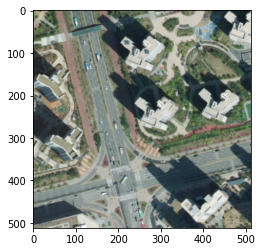

In [20]:
plt.figure()
plt.imshow(im1)

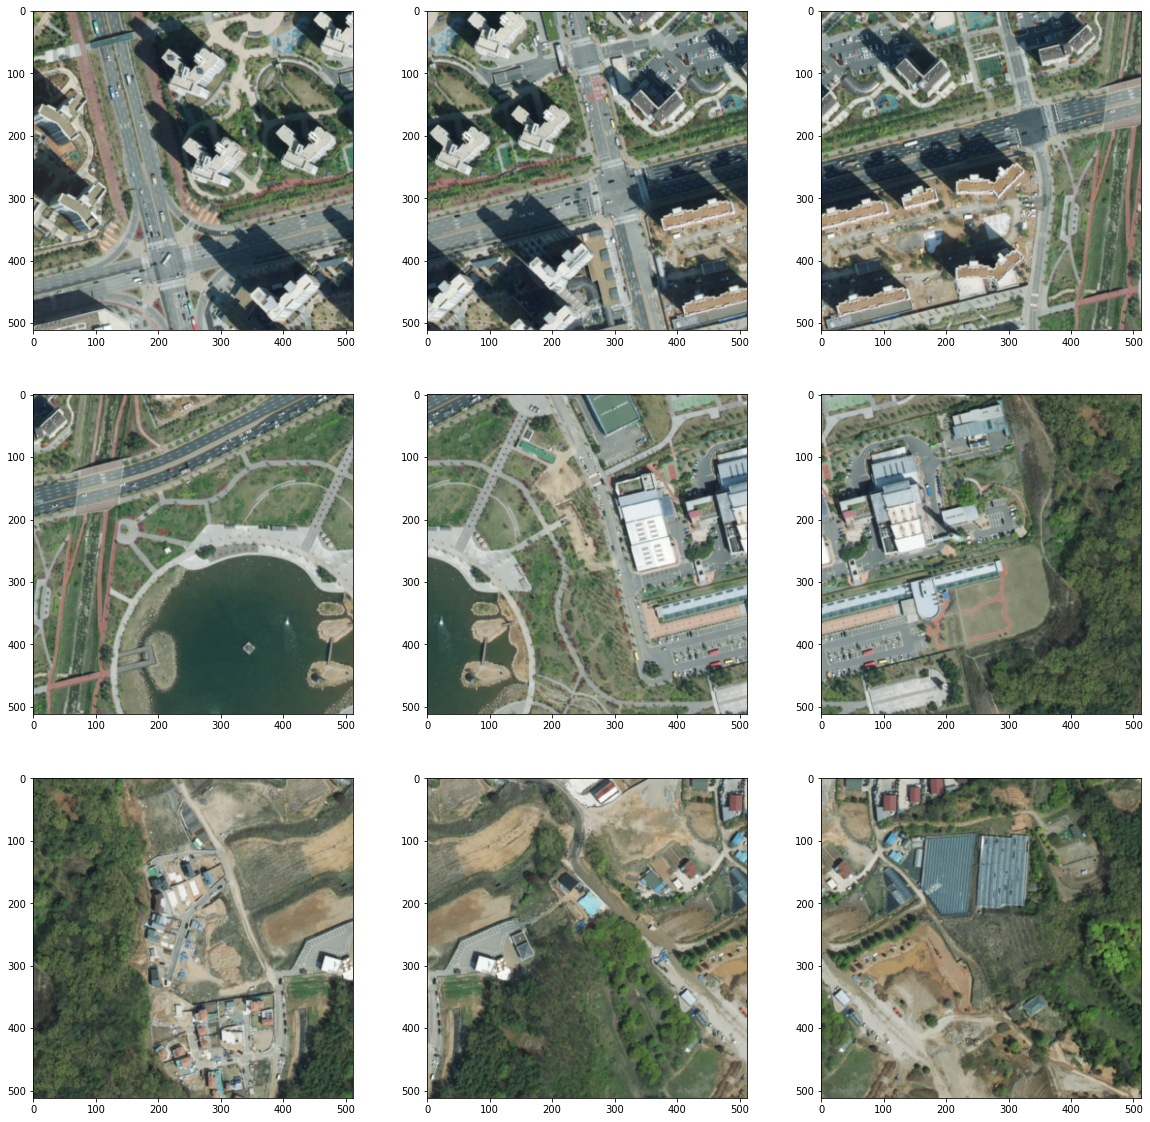

In [22]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    impath = os.path.join(rawtiffs_path, rawtiffs[i])
    im = tiff.imread(impath)
    plt.imshow(im)

## Label Files

In [23]:
label1_path = os.path.join(labeljsons_path, labeljsons[0])
label1data = json.load(open(label1_path))

In [24]:
label1data

{'type': 'FeatureCollection',
 'name': 'LC_AP_37607046_001_FGT',
 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::5186'}},
 'features': [{'type': 'Feature',
   'properties': {'ANN_CD': 10, 'ANN_NM': '건물'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[167095.6468231578, 560792.150136266],
      [167094.22999999954, 560792.150136266],
      [167094.22999999954, 560795.3082871719],
      [167095.02321734745, 560795.50801371],
      [167095.6468231578, 560792.150136266]]]}},
  {'type': 'Feature',
   'properties': {'ANN_CD': 10, 'ANN_NM': '건물'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[167175.20775271166, 560792.150136266],
      [167144.3805187422, 560792.150136266],
      [167144.3805187422, 560794.1042602079],
      [167149.44776496303, 560795.4685188083],
      [167146.14136993943, 560808.3792041454],
      [167149.21105429117, 560809.1521290217],
      [167153.8840144171, 560810.1369387897],
      [167174.05255905495, 560796.6912423607]

Each json file is a dictionary containing information about the corresponding image.
* 'name': name of the json file
* 'features': A list of dictionaries. Each dictionary contains the polygon information for each annotated object within the image.
    * 'properties' - 'ANN_CD': numerical code for the type of object
    * 'geometry' - 'coordinates' : polygon coordinates of the object

## META files

In [26]:
meta1_path = os.path.join(metafiles_path, metafiles[0])
meta1data = json.load(open(meta1_path))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 269: invalid start byte

There are some invalid bytes in our files. We use the following code to fix that:
```
#!/bin/bash

cd /workspace/Competition/map_segmentation/data/RAW/train/meta
find -type f -exec iconv -f utf-8 -t utf-8 -c {} -o /workspace/Competition/map_segmentation/data/RAW/train/meta_fixed/{} \;
```

In [27]:
metafiles_path = '/workspace/Competition/map_segmentation/data/RAW/train/meta_fixed'
metafiles = os.listdir(metafiles_path)
len(metafiles)

13520

In [28]:
meta1_path = os.path.join(metafiles_path, metafiles[0])
meta1data = json.load(open(meta1_path))

In [29]:
meta1data

[{'img_id': 'LC_AP_37607046_068',
  'img_width': 512,
  'img_height': 512,
  'img_type': 'aerophoto',
  'img_coordinate': 'EPSG:5186',
  'coordinates': '168465.365000002, 559877.975136267',
  'img_resolution': 0.51,
  'img_time': 2018,
  'img_provided': '',
  'ann_id': 'LC_AP_37607046_068_FGT',
  'ann_type': 'polygon',
  'ann_file_type': 'tif',
  'provided_nm': 'ѱȸ'}]

The metadata file also contains important information. The most important of these is the 'img_resolution'.

## Draw Polygons

### Test with single Image

In [33]:
imfile = rawtiffs[0]
imfile

'LC_AP_37607046_001.tif'

In [34]:
imname = imfile.split('.')[0]
imname

'LC_AP_37607046_001'

In [35]:
impath = os.path.join(rawtiffs_path, imfile)
labelpath = os.path.join(labeljsons_path, imname+'_FGT.json')
metapath = os.path.join(metafiles_path, imname+'_META.json')

In [36]:
img = tiff.imread(impath)
labeldata = json.load(open(labelpath))
metadata = json.load(open(metapath))

In [40]:
meta_coordinates = metadata[0]['coordinates'].split(', ')
origin = (float(meta_coordinates[0]), float(meta_coordinates[1]))
origin

(167094.485, 561053.015136268)

In [44]:
features = labeldata['features']
features

[{'type': 'Feature',
  'properties': {'ANN_CD': 10, 'ANN_NM': '건물'},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[167095.6468231578, 560792.150136266],
     [167094.22999999954, 560792.150136266],
     [167094.22999999954, 560795.3082871719],
     [167095.02321734745, 560795.50801371],
     [167095.6468231578, 560792.150136266]]]}},
 {'type': 'Feature',
  'properties': {'ANN_CD': 10, 'ANN_NM': '건물'},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[167175.20775271166, 560792.150136266],
     [167144.3805187422, 560792.150136266],
     [167144.3805187422, 560794.1042602079],
     [167149.44776496303, 560795.4685188083],
     [167146.14136993943, 560808.3792041454],
     [167149.21105429117, 560809.1521290217],
     [167153.8840144171, 560810.1369387897],
     [167174.05255905495, 560796.6912423607],
     [167175.20775271166, 560792.150136266]]]}},
 {'type': 'Feature',
  'properties': {'ANN_CD': 10, 'ANN_NM': '건물'},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[1

In [50]:
feature = features[0]
feature_type = feature['properties']['ANN_CD']
feature_polygon = feature['geometry']['coordinates'][0]

In [51]:
feature_polygon

[[167095.6468231578, 560792.150136266],
 [167094.22999999954, 560792.150136266],
 [167094.22999999954, 560795.3082871719],
 [167095.02321734745, 560795.50801371],
 [167095.6468231578, 560792.150136266]]

In [ ]:
polygon_coordinates = []
for point in feature_polygon:
    npoint = (max(0,point[0]-org_x), max(0,org_y-point[1]))